In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
plt.rcParams['figure.facecolor'] = '#FFEDD8'

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


set_config(display='diagram') 

import warnings
warnings.filterwarnings('ignore')




In [2]:
train_df = pd.read_csv('D:\\Data Science\\Data Camp ,datascience track\\کدهای عالی نوشته شده در نوتبوک\\train.csv')
test_df = pd.read_csv('D:\\Data Science\\Data Camp ,datascience track\\کدهای عالی نوشته شده در نوتبوک\\test.csv')

In [3]:
missing_train = train_df.isna().sum().sort_values(ascending=False)
missing_train = missing_train[missing_train>0]
missing_percent = missing_train/len(train_df)

missing_data = pd.DataFrame({'Missing':missing_train , 'Ratio':missing_percent})
missing_data

Missing     Ratio
PoolQC           1453  0.995205
MiscFeature      1406  0.963014
Alley            1369  0.937671
Fence            1179  0.807534
FireplaceQu       690  0.472603
LotFrontage       259  0.177397
GarageYrBlt        81  0.055479
GarageCond         81  0.055479
GarageType         81  0.055479
GarageFinish       81  0.055479
GarageQual         81  0.055479
BsmtFinType2       38  0.026027
BsmtExposure       38  0.026027
BsmtQual           37  0.025342
BsmtCond           37  0.025342
BsmtFinType1       37  0.025342
MasVnrArea          8  0.005479
MasVnrType          8  0.005479
Electrical          1  0.000685

# dropping columns that have more than 40 percent missing value

In [4]:
cols_to_drop = missing_data[missing_data['Ratio']>0.4].index
cols_to_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [5]:
missing_test= test_df.isna().sum().sort_values(ascending=False)/len(test_df)
missing_test[missing_test>0]

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
BsmtFullBath    0.001371
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
TotalBsmtSF     0.000685
Exterior2nd     0.000685
GarageCars      0.000685
Exterior1st     0.000685
GarageArea      0.000685
SaleType        0.000685
dtype: float64

In [6]:
train_df = train_df.drop(cols_to_drop , axis=1)
test_df = test_df.drop(cols_to_drop,axis=1)

In [7]:
# drop Id column
train_df = train_df.drop('Id',axis=1)
test_df = test_df.drop('Id', axis=1)

In [8]:
print(train_df.shape , test_df.shape)

(1460, 75) (1459, 74)


In [9]:
train_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [10]:
train_df.describe(include='object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
count          1460       1460       1460  ...       1459        1460   
unique           25          9          8  ...          5           4   
top           NAmes       Norm       Norm  ...      SBrkr          TA   
freq            225       1260       1445  ...       1334         735   

       Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count        1460       1379         1379       1379       1379       1460   
unique          7          6            3          5          5          3   
top           Typ     Attchd          Unf         TA         TA          Y   
freq         1360        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 38 columns]

# EDA

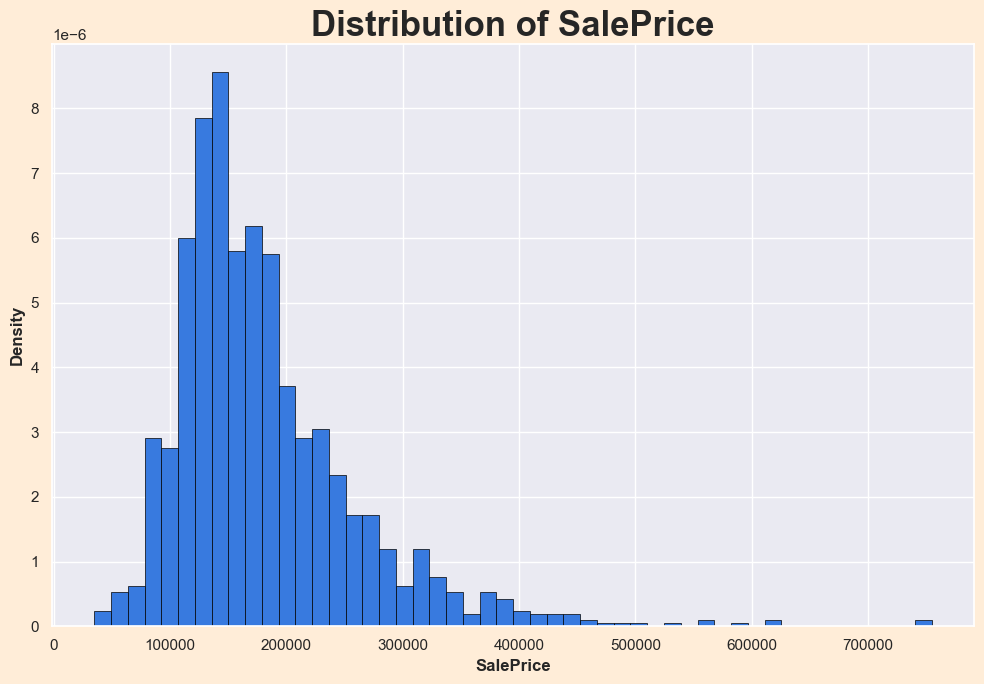

In [11]:
plt.figure(figsize=(10, 7))
plt.hist(train_df['SalePrice'], bins=50, color = '#387ADF', edgecolor = 'black', linewidth = 0.5, density=True)
plt.xlabel('SalePrice', fontweight = 'bold')
plt.ylabel('Density', fontweight = 'bold')
plt.title('Distribution of SalePrice', fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

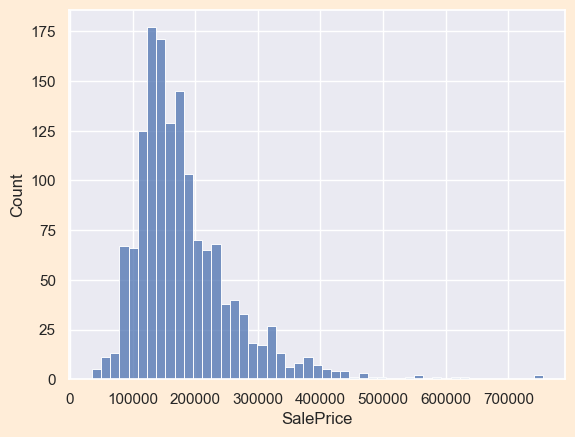

In [12]:
sns.histplot(x='SalePrice', data=train_df)

We see that the distribution of the SalePrice column is not normal, so we will apply a log transformation to this column.

<Axes: xlabel='SalePrice', ylabel='Count'>

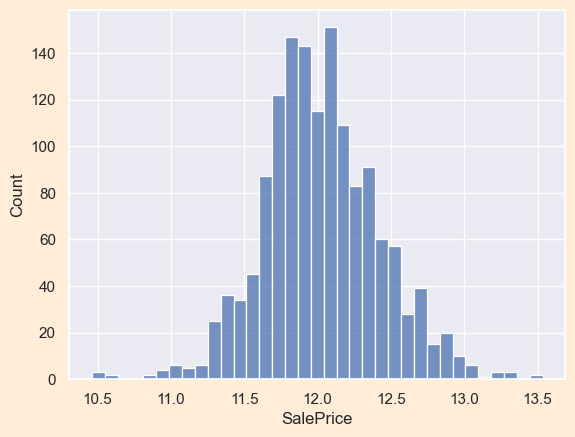

In [13]:
log_price = np.log(train_df['SalePrice'])
sns.histplot(x=log_price , data=train_df)

Now, it resembles a normal distribution.

We add the log_SalePrice column to the train_df dataframe, and then we will remove the SalePrice column from the dataframe.

In [14]:
train_df['log_SalePrice']=log_price
train_df = train_df.drop('SalePrice',axis=1)

# Exploring Numerical columns

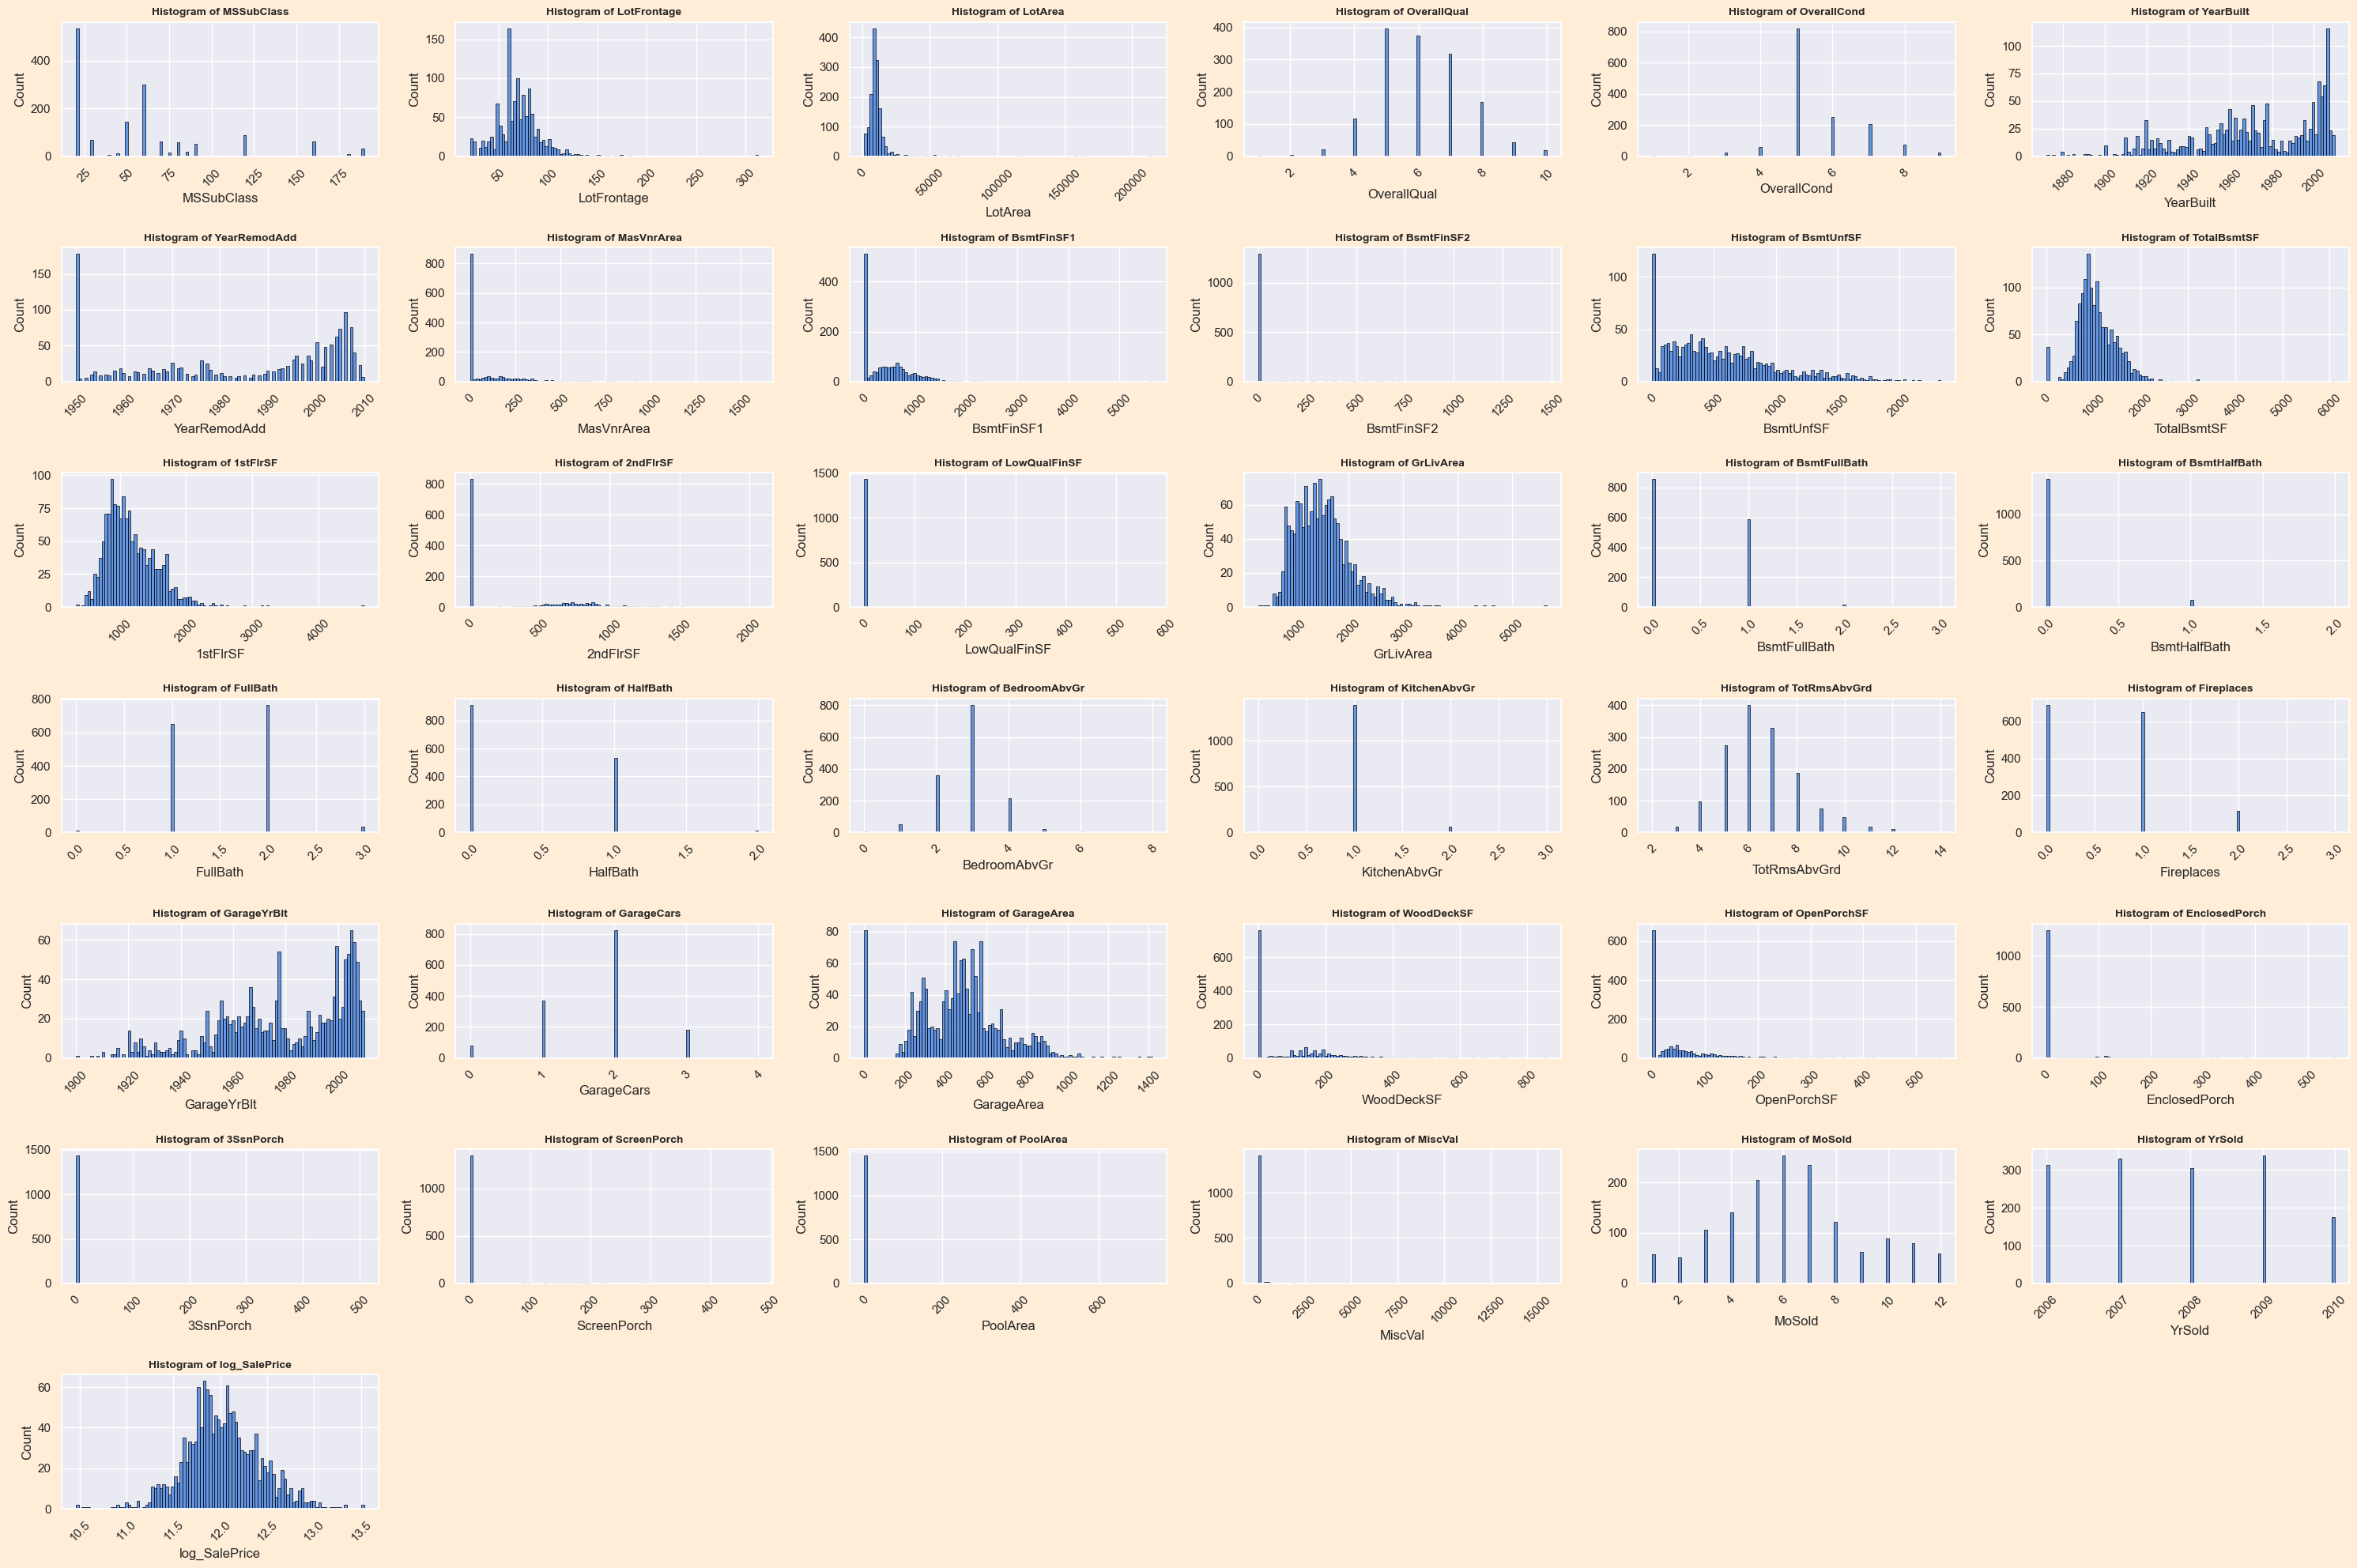

In [15]:
# ploting Numerical columns

num_cols = train_df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(30,20))

for i,col in enumerate(num_cols,1):
  plt.subplot(7,6,i)
  sns.histplot(x=col , data=train_df ,bins=100,color = '#387ADF',edgecolor = 'black', linewidth = 0.5)
  plt.title(f'Histogram of {col}',  fontsize=10, fontweight = 'bold')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

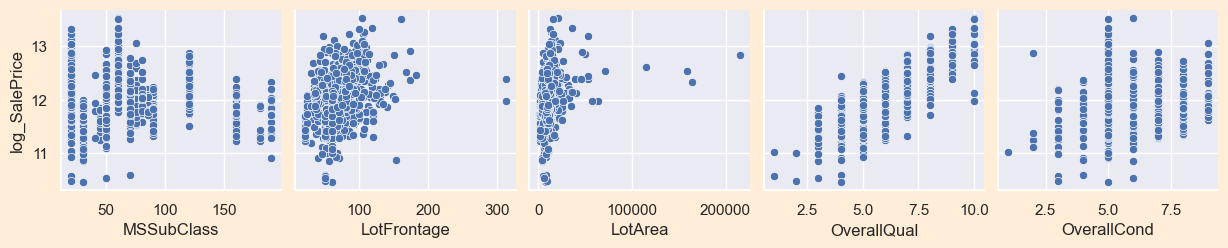

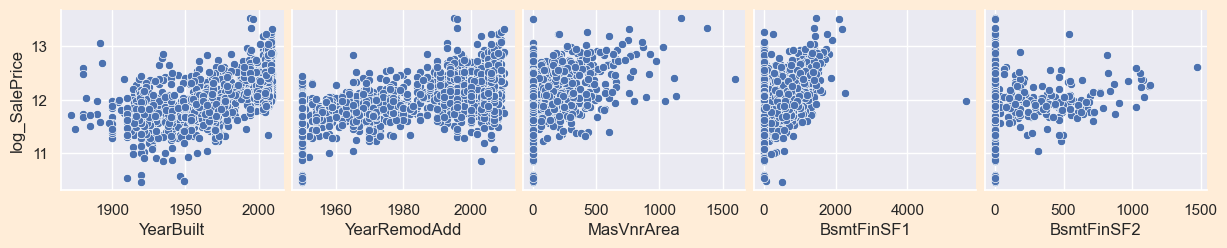

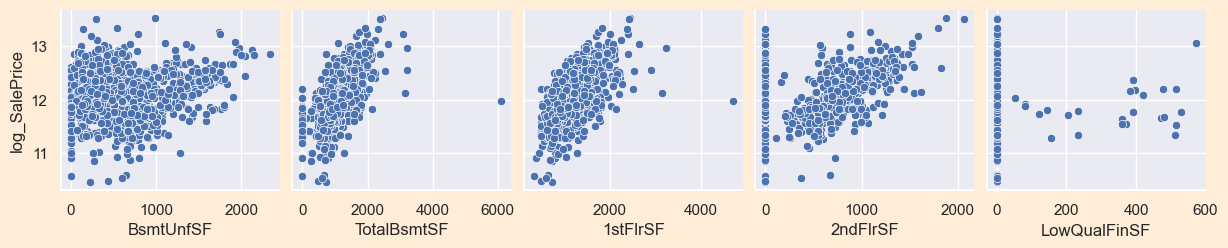

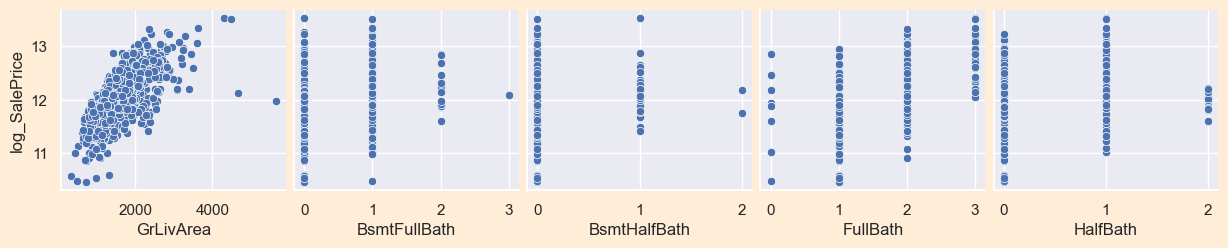

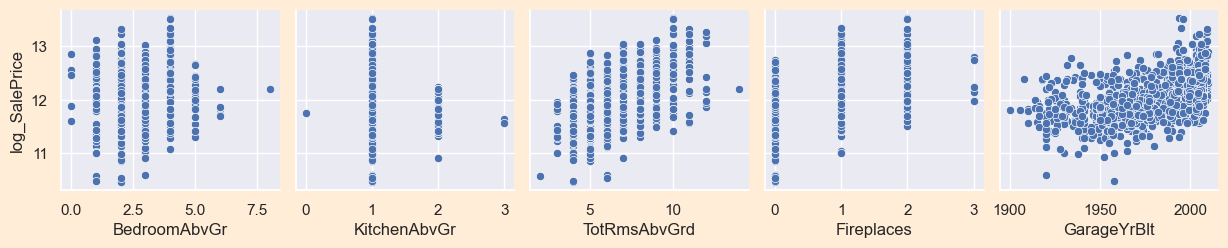

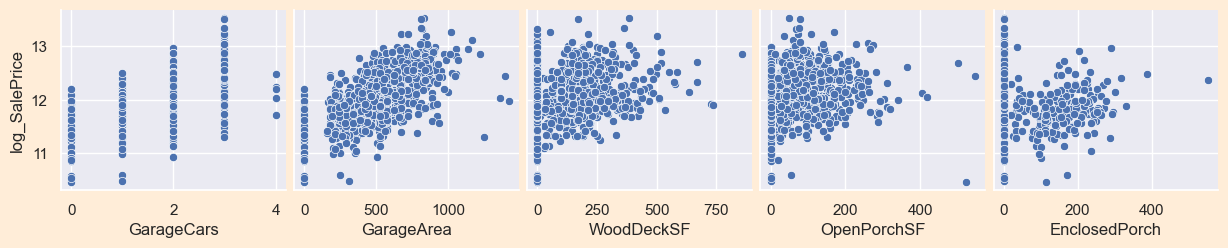

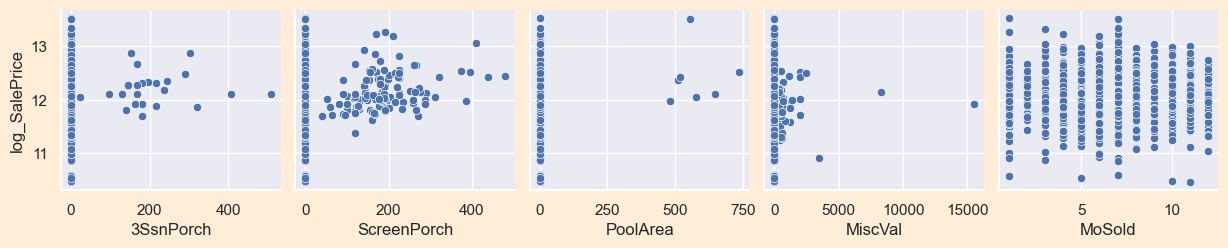

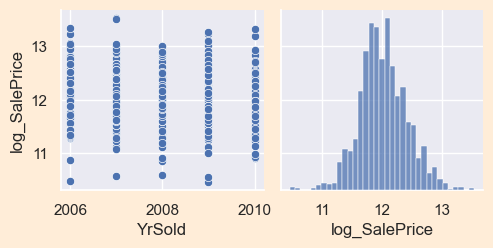

In [16]:
#pairplot of numerical columns
numerical_df = train_df.select_dtypes(include=['float64','int64'])

for i in range(0, len(numerical_df.columns), 5):
    sns.pairplot(data=numerical_df,
                x_vars=numerical_df.columns[i:i+5],
                y_vars=['log_SalePrice'])

# Correlation between SalePrice and other attributes

<Axes: >

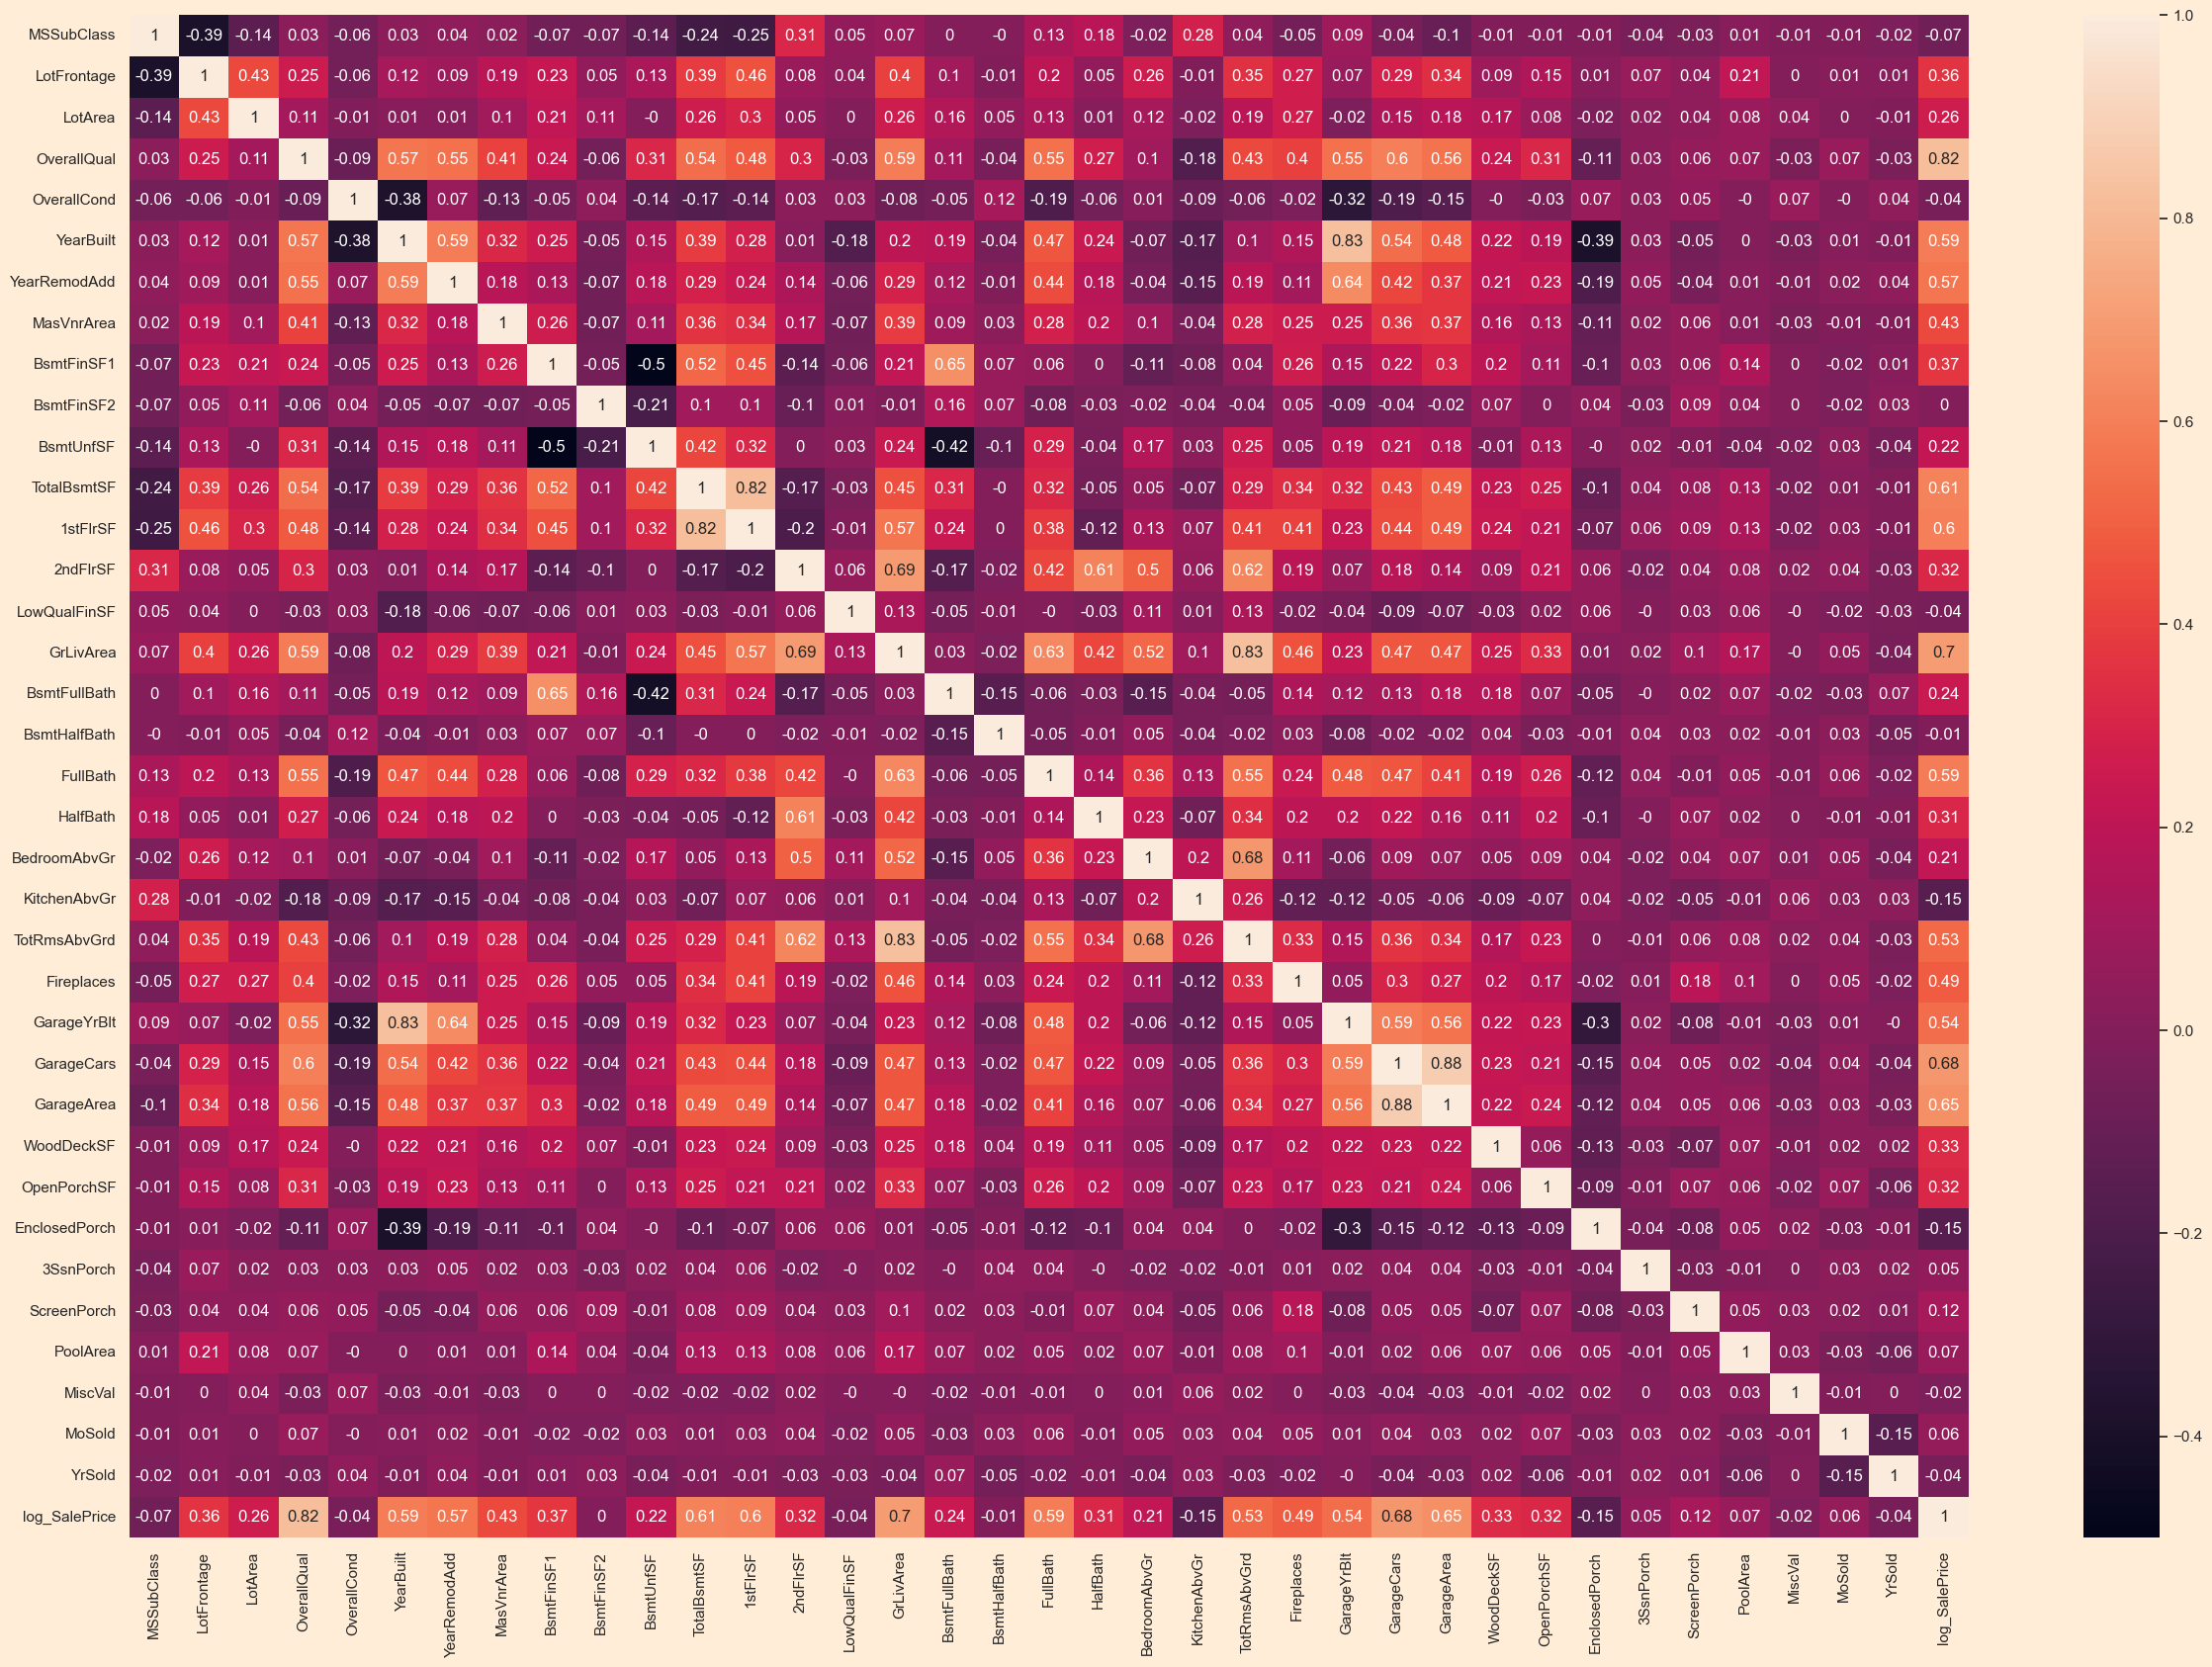

In [17]:
# Heatmap of correlation
corr_matrix = train_df.select_dtypes(include=['float64','int64']).corr().round(2)
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix , annot=True)

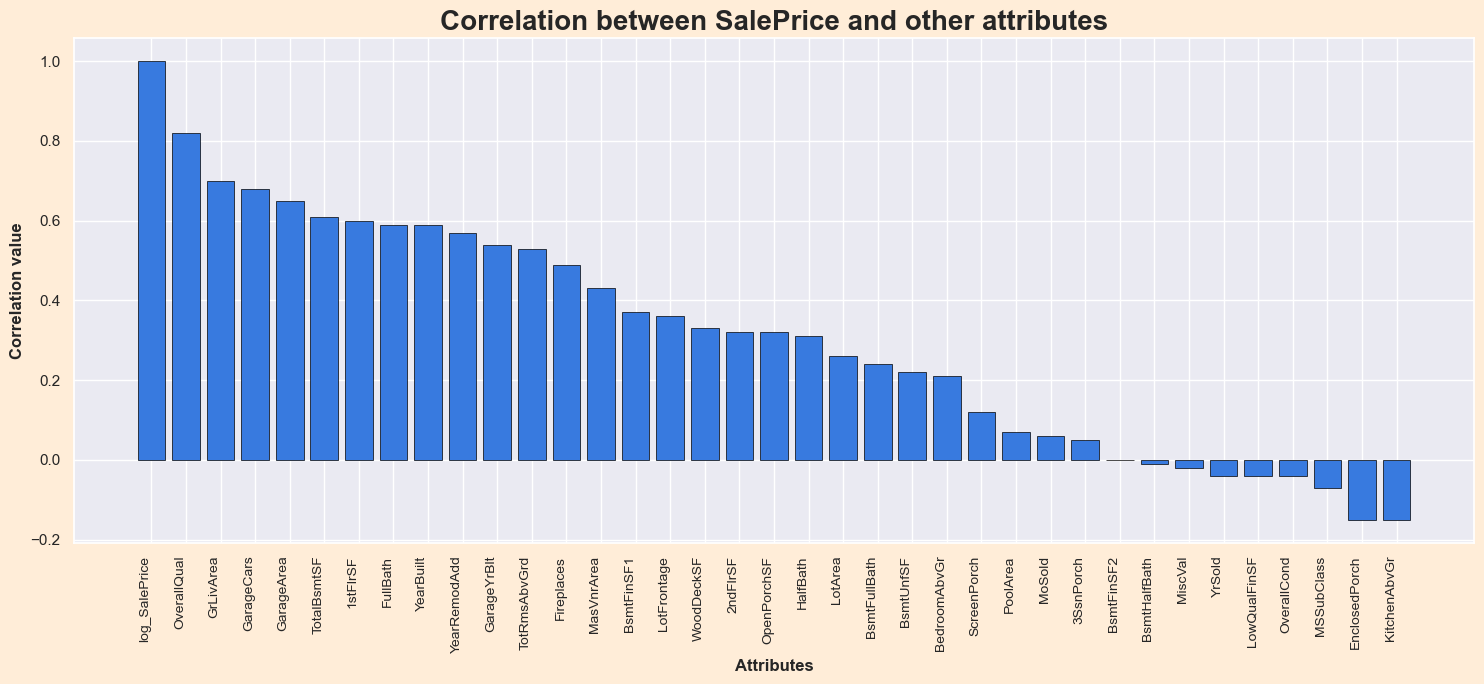

In [18]:
# Bar Plot of Correlations
corr_matrix = train_df.select_dtypes(include=['float64','int64']).corr().round(2)
correlation_values = corr_matrix['log_SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(correlation_values.index, correlation_values.values, color = '#387ADF', edgecolor = 'black', linewidth = 0.5)

plt.title('Correlation between SalePrice and other attributes', fontsize=20, fontweight = 'bold')
plt.xlabel('Attributes', fontsize=12, fontweight = 'bold')
plt.ylabel('Correlation value', fontsize=12, fontweight = 'bold')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Exploring Categorical Columns

In [19]:
categorical_df = train_df.select_dtypes(include=['O'])
categorical_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

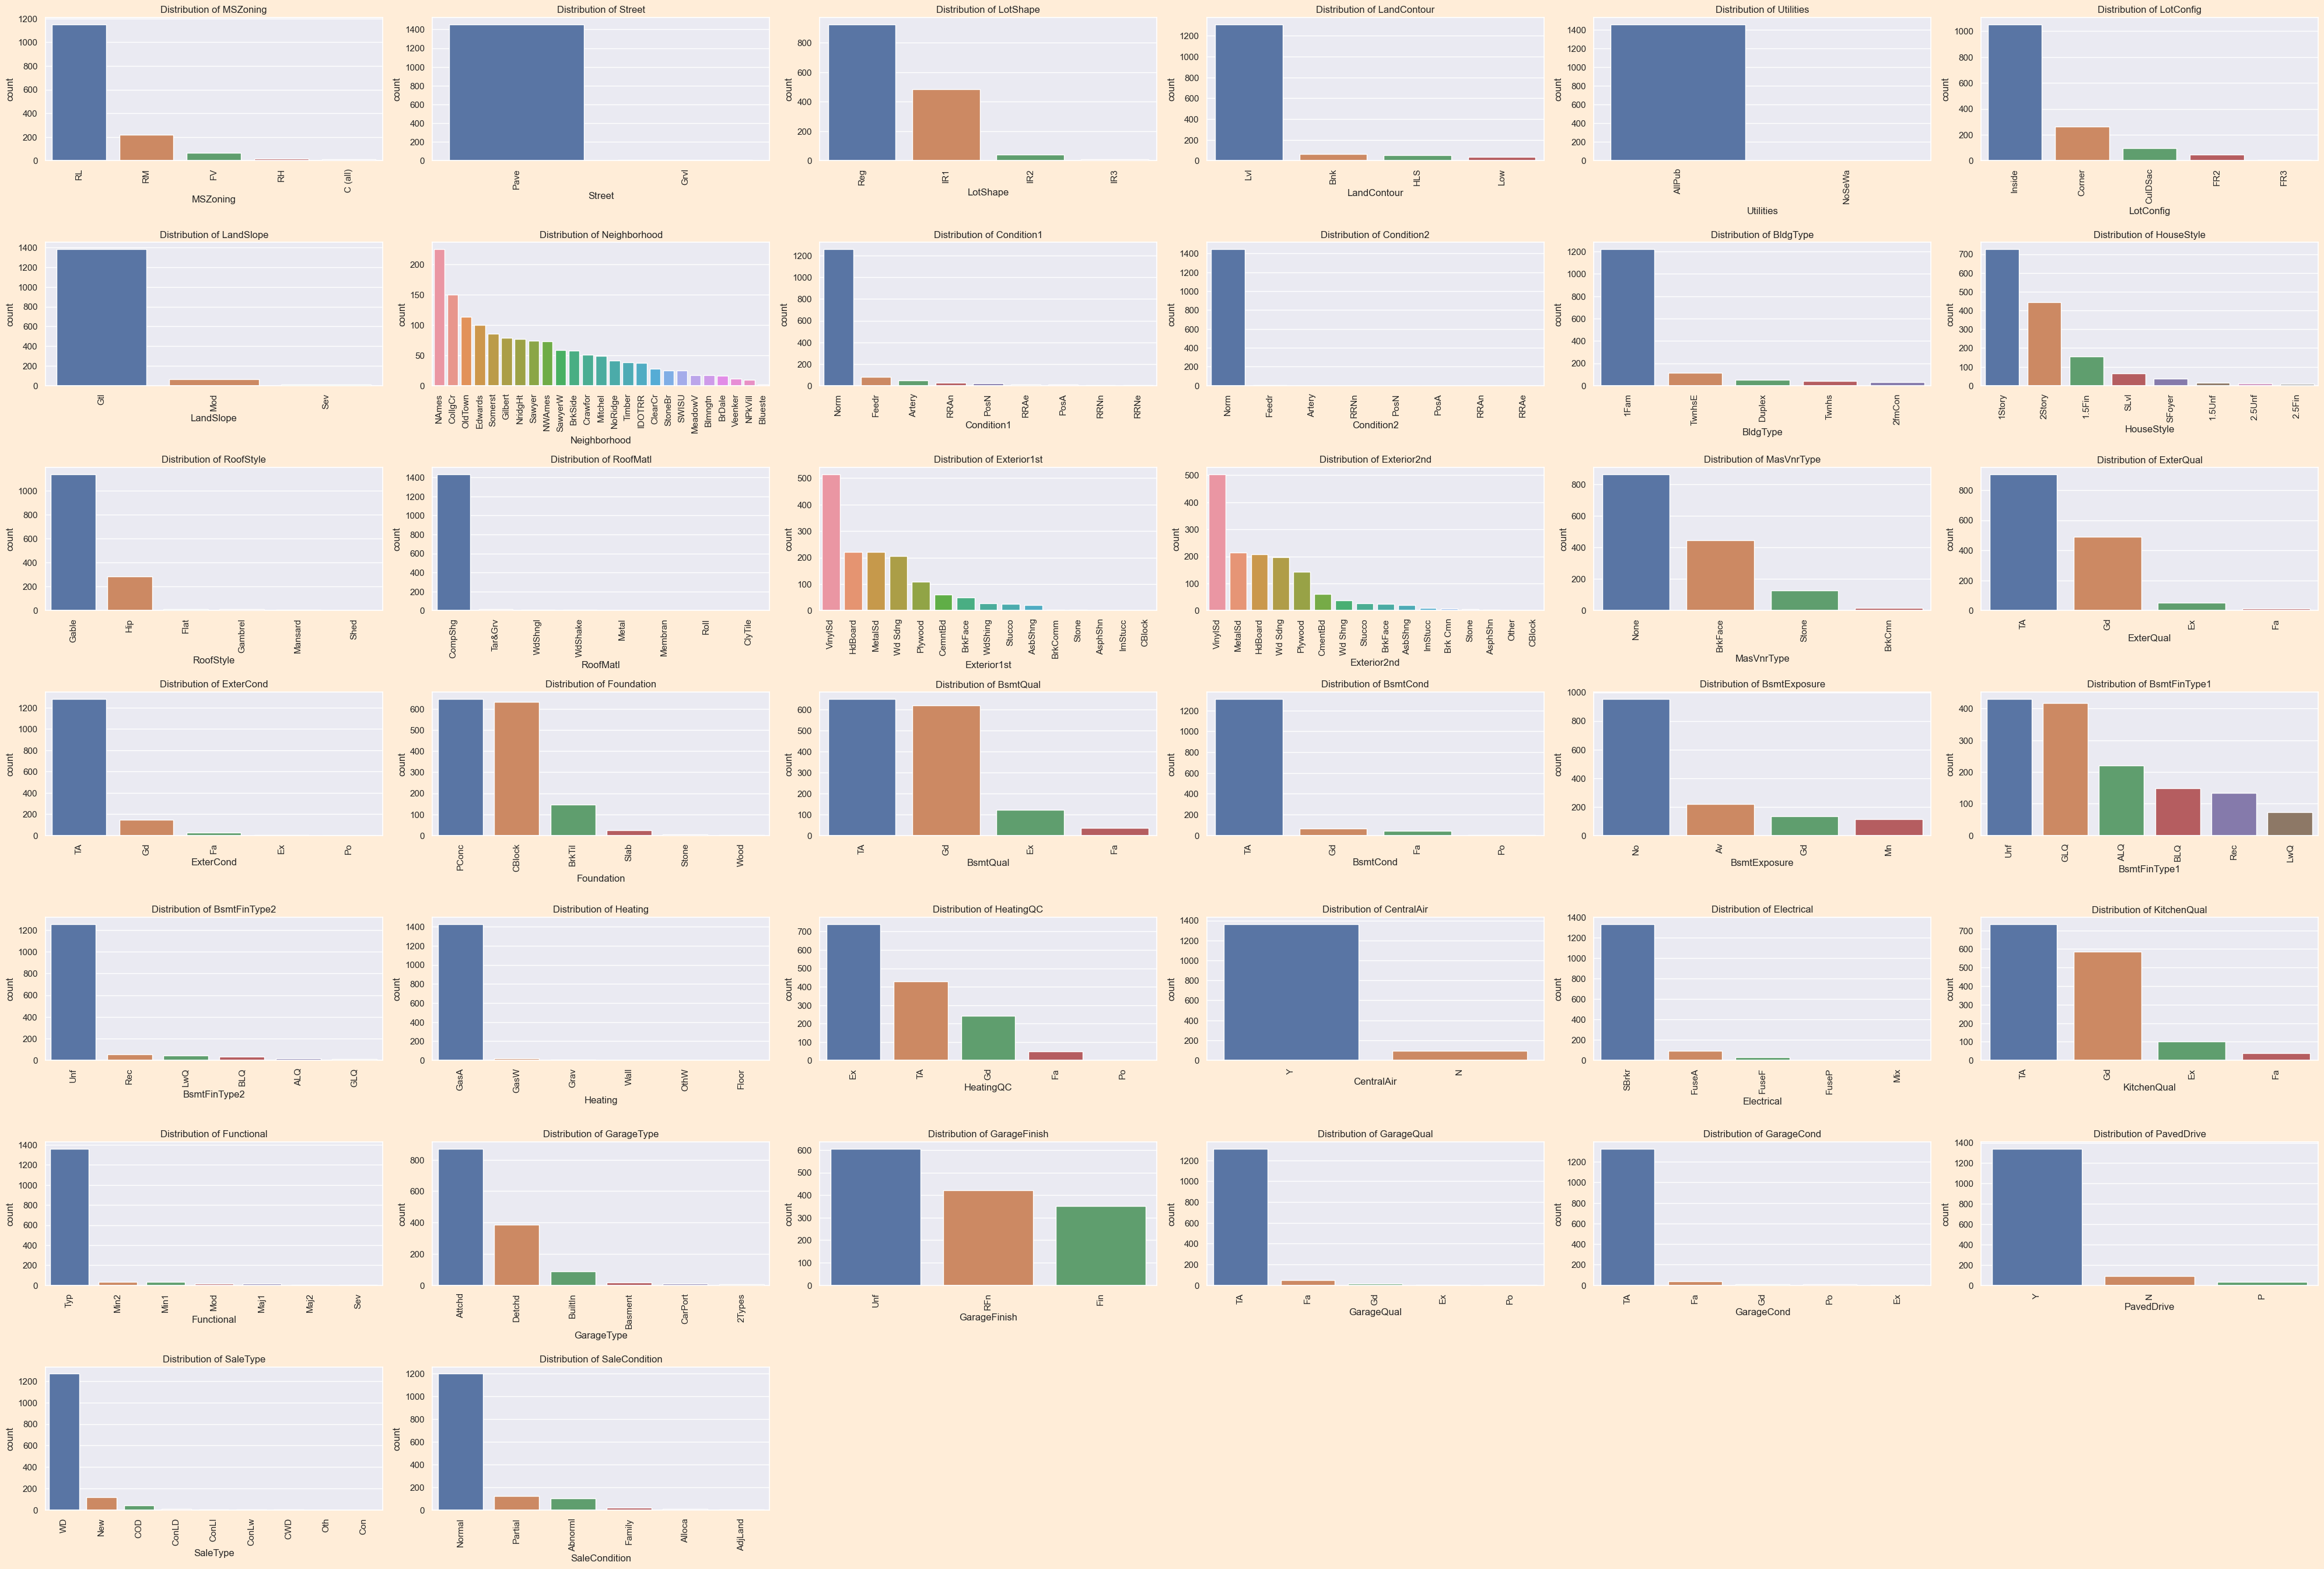

In [20]:
# Plotting Bar of categorical columns

cate_cols = train_df.select_dtypes(include=['object']).columns
plt.figure(figsize=(40,30))

for i,col in enumerate(cate_cols,1):
  plt.subplot(8,6,i)
  sns.countplot(x=col , data=train_df , order=train_df[col].value_counts().index)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show() 


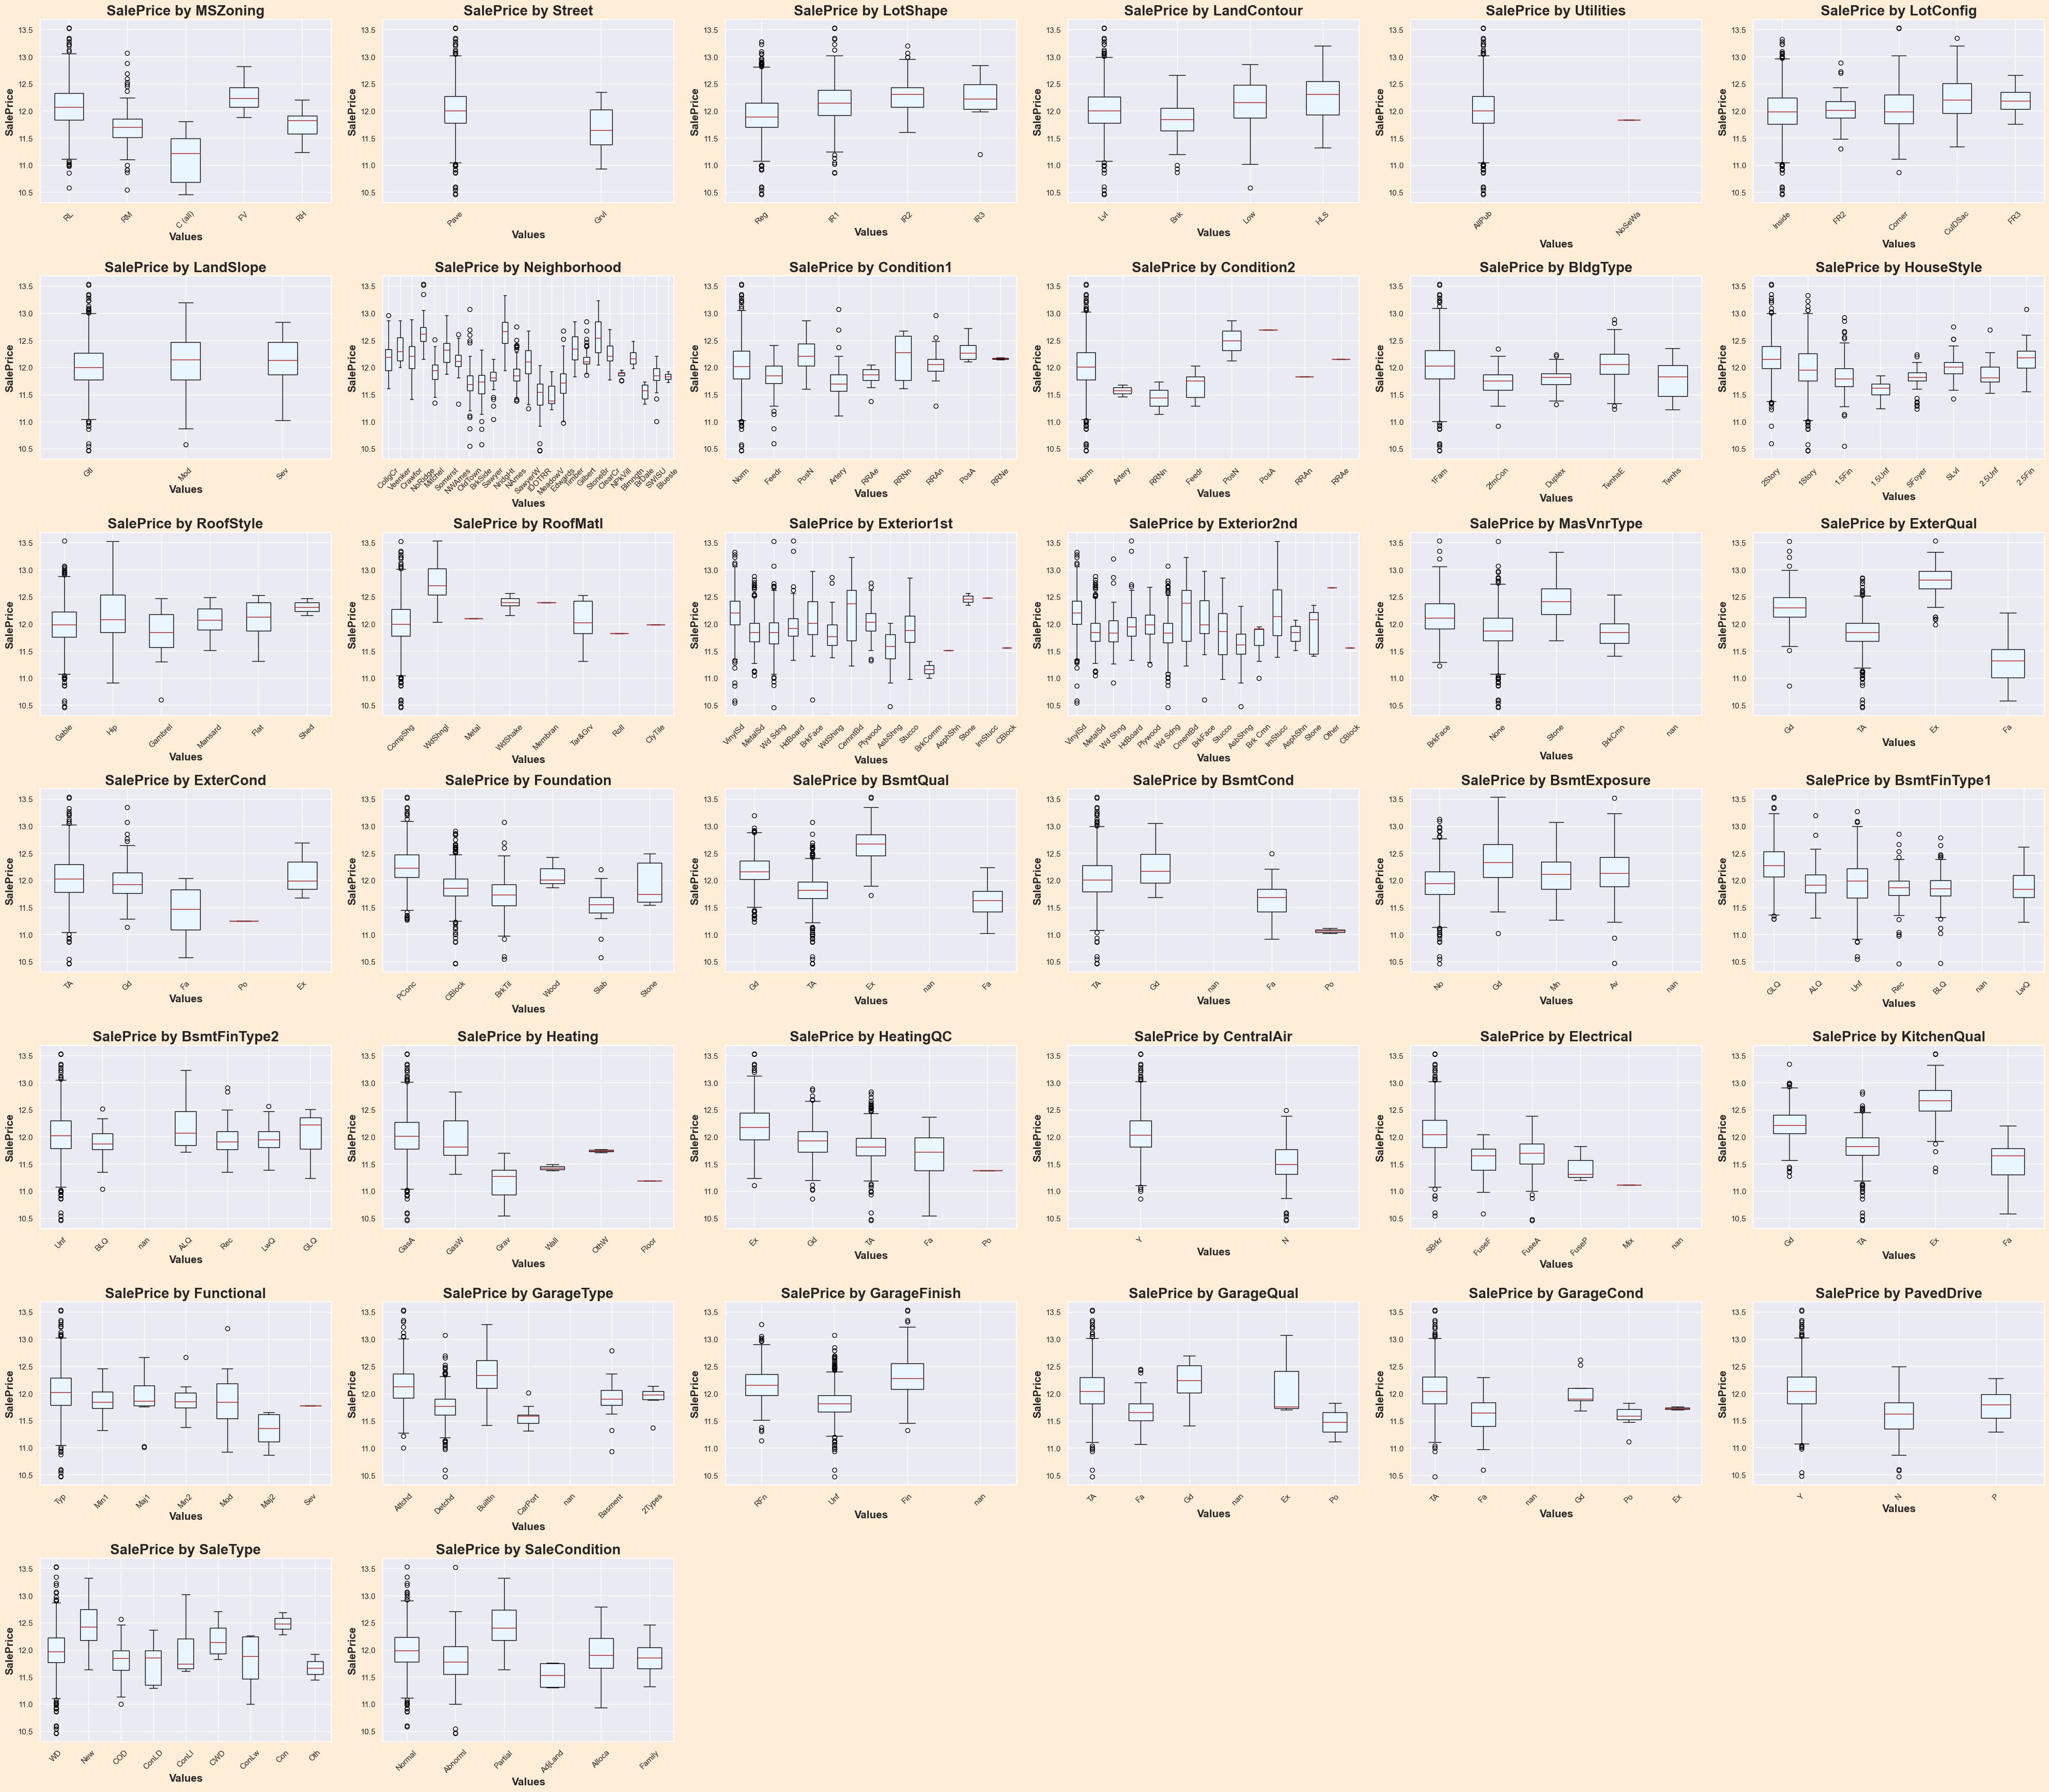

In [21]:
# Plotting Box for categorical columns and SalePrice column

categorical_df = train_df.select_dtypes(include=['O'])

n_cols = 6
n_rows = len(categorical_df.columns) // n_cols + (len(categorical_df.columns) % n_cols > 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, n_rows * 5))
axes = axes.flatten()


for i, col in enumerate(categorical_df.columns):
    axes[i].boxplot([train_df[train_df[col] == category]['log_SalePrice'] for category in train_df[col].unique()],
                    labels=train_df[col].unique(), notch=False, patch_artist=True, boxprops=dict(facecolor='#E9F6FF'),
            medianprops=dict(color='#B31312', linewidth=1))
    
    axes[i].set_title(f'SalePrice by {col}', fontsize=20, fontweight = 'bold')
    axes[i].set_xlabel('Values', fontsize=15, fontweight = 'bold')
    axes[i].set_ylabel('SalePrice', fontsize=15, fontweight = 'bold')
    plt.setp(axes[i].artists, alpha=0.5, linewidth=2, edgecolor="k")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Handling Missing Values

In [22]:
miss =train_df.isna().sum().sort_values(ascending=False)
miss[miss>0]

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [23]:
# define a function to impute missing values

def fill_na(df):
    for column in df.columns:
        if column == 'PoolQC':
            df[column] = df[column].fillna('No Pool')
        elif column == 'Electrical':
            df = df[df[column].isnull() != True]
        elif column == 'MasVnrType':
            df[column] = df[column].fillna('No Masonry veneer')
        elif column == 'MasVnrArea':
            df[column] = df[column].fillna('0')
        elif column == 'MiscFeature':
            df[column] = df[column].fillna('No Misc')
        elif column == 'Alley':
            df[column] = df[column].fillna('No Alley')
        elif column == 'Fence':
            df[column] = df[column].fillna('No Fence')
        elif column == 'FireplaceQu':
            df[column] = df[column].fillna('No Fireplace')
        elif column == 'GarageYrBlt': 
            df[column] = df[column].fillna(df[column].mean())
        elif column in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
            df[column] = df[column].fillna('No Garage')
        elif column in ( 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
            df[column] = df[column].fillna('No Basement')
        elif column == 'LotFrontage':
            df[column] = df[column].fillna(df[column].median())

    return df
    

In [24]:
train_df_cleaned = fill_na(train_df)
test_df_cleaned = fill_na(test_df)

In [25]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [26]:
train_df_cleaned.isna().sum().sum()

0

In [30]:
# 'MasVnrArea' column is numeric but its dtype is object,so we will change the data type.

train_df_cleaned['MasVnrArea']= train_df_cleaned['MasVnrArea'].astype(float)


# Pipeline for scaling and encoding data

we need to scale numerical columns and OneHotEncoding categorical columns.

In [31]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# splitting data to X,y
X = train_df_cleaned.drop('log_SalePrice',axis=1)
y= train_df_cleaned['log_SalePrice']

numeric_columns = X.select_dtypes(include=['float64','int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

num_transformer = StandardScaler()
cate_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[ ('num',num_transformer,numeric_columns),('cate',cate_transformer,categorical_columns)])

pipeline = Pipeline(steps=[('preprocessor',preprocessor)])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBat...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [32]:
# fit and transform pipeline to X 
X_transformed = pipeline.fit_transform(X)

# train test split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)

# Model

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
lgbm = LGBMRegressor()

# Tuning hyperparameters 

1. XGBRegressor Model

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model
xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 3, 5]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 0.7, 'scale_pos_weight': 5, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [36]:
random_search.best_score_


-0.017809268027463947

In [37]:
best_model_xgb= random_search.best_estimator_
best_model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
y_pred_xgb = best_model_xgb.predict(X_test)

In [42]:
mean_squared_error(y_test,y_pred_xgb)**(1/2)

0.1252243953963854

In [43]:
best_model_xgb.score(X_test,y_test)

0.9089613626373486

In [44]:
best_model_xgb.score(X_train,y_train)

0.9647975047547384

2. LGBMRegressor Model

In [45]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model
lgbm = LGBMRegressor(random_state=42)

# Define the hyperparameter grid


param_grid = {
    'num_leaves': [5, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_bin': [50, 100, 200],
    'bagging_fraction': [0.6, 0.7, 0.8],
    'bagging_freq': [3, 5, 7],
    'feature_fraction': [0.2, 0.4, 0.6]
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)
best_model_lgbm = random_search.best_estimator_
print('Best Model : ',best_model_lgbm)
print('Best Score : ',random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Best parameters found:  {'num_leaves': 10, 'n_estimators': 1000, 'max_bin': 100, 'learning_rate': 0.01, 'feature_fraction': 0.2, 'bagging_freq': 5, 'bagging_fraction': 0.7}
Best Model :  LGBMRegressor(bagging_fraction=0.7, bagging_freq=5, feature_fraction=0.2,
              learning_rate=0.01, max_bin=100, n_estimators=1000, num_leaves=10,
              random_state=42)
Best Score :  -0.01758898106027076


In [46]:
best_model_lgbm.fit(X_train,y_train)
y_pred_lgbm = best_model_lgbm.predict(X_test)

In [47]:
mean_squared_error(y_test,y_pred_lgbm)**(1/2)

0.12785247981955342

In [48]:
best_model_lgbm.score(X_test,y_test)

0.9051000084704185

In [49]:
best_model_lgbm.score(X_train,y_train)

0.9507241833843516

# Predict on test data

In [50]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RH         80.0    11622   Pave      Reg         Lvl   
1          20       RL         81.0    14267   Pave      IR1         Lvl   
2          60       RL         74.0    13830   Pave      IR1         Lvl   
3          60       RL         78.0     9978   Pave      IR1         Lvl   
4         120       RL         43.0     5005   Pave      IR1         HLS   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...           0             0         0   
1    AllPub    Corner       Gtl  ...          36             0         0   
2    AllPub    Inside       Gtl  ...          34             0         0   
3    AllPub    Inside       Gtl  ...          36             0         0   
4    AllPub    Inside       Gtl  ...          82             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0         120        0        0       6    2010        WD        Normal  
1           0        0    12500       6    2010        WD        Normal  
2           0        0        0       3    2010        WD        Normal  
3           0        0        0       6    2010        WD        Normal  
4         144        0        0       1    2010        WD        Normal  

[5 rows x 74 columns]

In [51]:
test_df_cleaned = fill_na(test_df)


In [53]:
preprocessed_test_df = pipeline.transform(test_df_cleaned)

In [54]:
y_pred_test_xgb = best_model_xgb.predict(preprocessed_test_df)
y_pred_test_lgbm = best_model_lgbm.predict(preprocessed_test_df)